In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:09<00:00, 186MB/s]
100% 1.06G/1.06G [00:09<00:00, 121MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [ ]:
#generators create batches
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 20000 files belonging to 2 classes.


In [ ]:
#normalize
def process(image,label):
  image = tf.cast(image/255, tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
#creating CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding = 'valid',activation='relu',input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2),strides = 2, padding = 'valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding = 'valid',activation='relu',input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2),strides = 2, padding = 'valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding = 'valid',activation='relu',input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2),strides = 2, padding = 'valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0,1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0,1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=5,validation_data=validation_ds)

Epoch 1/5
625/625 [==============================] - 4489s 7s/step - loss: 1.1442 - accuracy: 0.6518 - val_loss: 0.5669 - val_accuracy: 0.7172
Epoch 2/5
625/625 [==============================] - 4467s 7s/step - loss: 0.5489 - accuracy: 0.7434 - val_loss: 0.4492 - val_accuracy: 0.8011
Epoch 3/5
625/625 [==============================] - 4404s 7s/step - loss: 0.4425 - accuracy: 0.8002 - val_loss: 0.4463 - val_accuracy: 0.7901
Epoch 4/5
625/625 [==============================] - 4366s 7s/step - loss: 0.3619 - accuracy: 0.8393 - val_loss: 0.2897 - val_accuracy: 0.8776
Epoch 5/5
625/625 [==============================] - 4380s 7s/step - loss: 0.2855 - accuracy: 0.8806 - val_loss: 0.2994 - val_accuracy: 0.8782


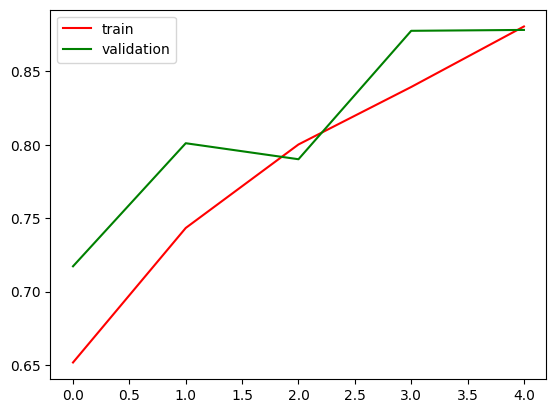

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='green',label='validation')
plt.legend()
plt.show()

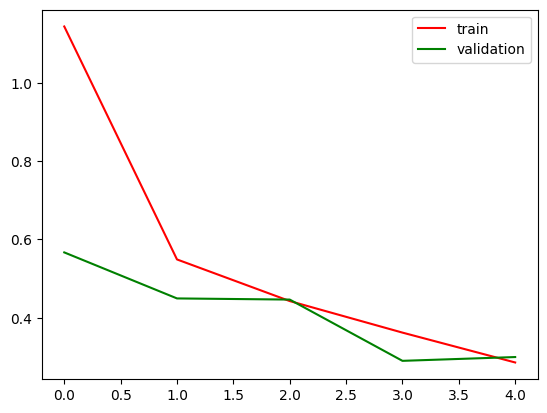

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='green',label='validation')
plt.legend()
plt.show()

In [ ]:
#need to reduce complexity

#add more data

In [ ]:
import cv2

In [ ]:
test_image = cv2.imread('/content/cat.jpeg')

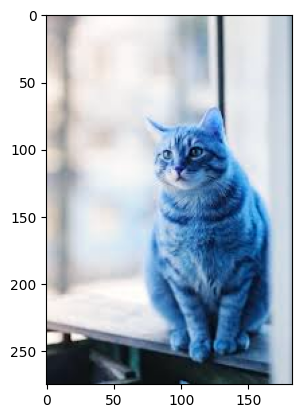

In [ ]:
plt.imshow(test_image)

In [ ]:
test_image.shape

(275, 183, 3)

In [ ]:
test_image = cv2.resize(test_image,(256,256))

In [ ]:
test_input = test_image.reshape(1,256,256,3)

In [ ]:
pred = model.predict(test_input)

1/1 [==============================] - 0s 302ms/step


In [ ]:
if pred == 0 :
  print("it's a Dog")
else:
  print("it's a Cat")

it's a Cat
